<a href="https://colab.research.google.com/github/sowndsgood/LinearAlgebra/blob/main/Diagonalization/Diagonalization_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

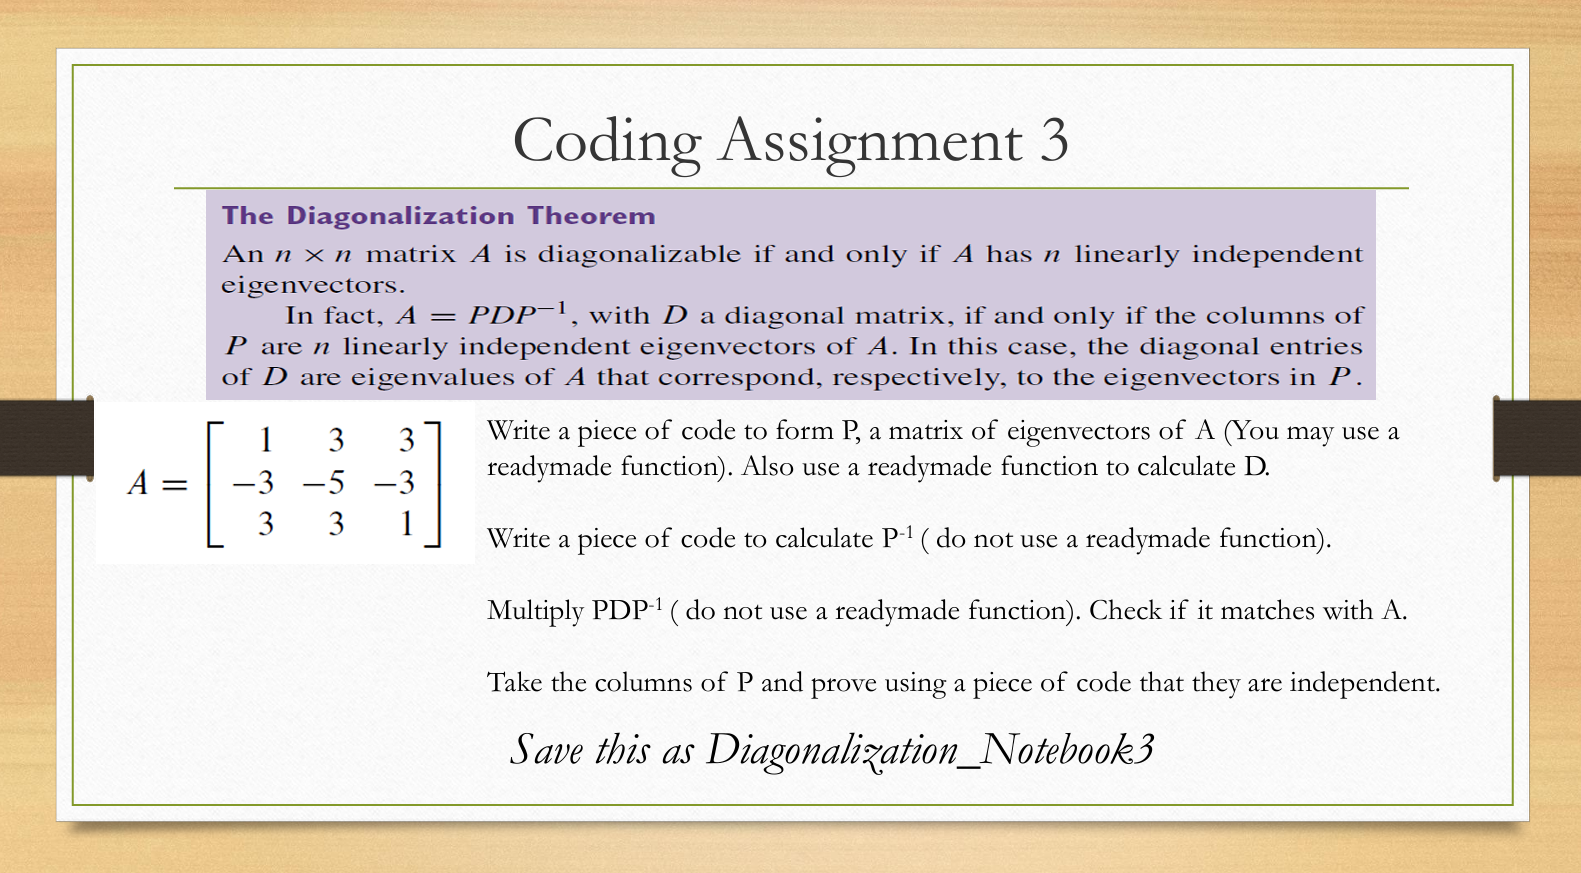

### Importing Libraries

In [1]:
# Importing the numpy library for numerical computations
import numpy as np

### Matrix A

In [2]:
# Creating a 3x3 numpy array named 'A'
A = np.array([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])

# Printing the array 'A' to the console
print(A)

[[ 1  3  3]
 [-3 -5 -3]
 [ 3  3  1]]


### Eigen Values and Vectors

In [3]:
# Calculating the eigenvalues and eigenvectors of the matrix 'A'
eigenvalues, P = np.linalg.eig(A)

# Printing the eigenvectors (P)
print("\nEigenvectors (P):")
print(P)

# Printing the eigenvalues
print("\nEigenvalues:")
print(eigenvalues)


Eigenvectors (P):
[[ 5.77350269e-01 -1.28197512e-16 -6.72654054e-01]
 [-5.77350269e-01 -7.07106781e-01  7.37141689e-01]
 [ 5.77350269e-01  7.07106781e-01 -6.44876349e-02]]

Eigenvalues:
[ 1. -2. -2.]


### Matrix D

In [4]:
# Creating a diagonal matrix 'D' from the eigenvalues
D = np.diag(eigenvalues)

# Printing the diagonal matrix 'D'
print("\nDiagonal Matrix (D) of Eigenvalues:")
print(D)


Diagonal Matrix (D) of Eigenvalues:
[[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]


### Function to find inverse of matrix

In [5]:
def matrix_inverse(matrix):

    # Get the size of the matrix
    n = matrix.shape[0]

    # Create an identity matrix of the same size as the input matrix
    I = np.eye(n)

    # Augment the input matrix with the identity matrix
    augmented_matrix = np.hstack((matrix, I))

    # Perform Gaussian elimination with partial pivoting
    for i in range(n):
        # Divide the current row by its diagonal element to make the diagonal element 1
        factor = augmented_matrix[i][i]
        augmented_matrix[i] = augmented_matrix[i] / factor

        # Subtract multiples of the current row from other rows to make all elements below the diagonal 0
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j][i]
                augmented_matrix[j] = augmented_matrix[j] - factor * augmented_matrix[i]

    # Extract the inverse matrix from the augmented matrix
    matrix_inverse = augmented_matrix[:, n:]

    return matrix_inverse


### Inverse of Matrix P

In [6]:
# Computing the inverse of the matrix P using the custom function matrix_inverse
P_inv = matrix_inverse(P)

# Printing the inverse of the matrix P
print("Inverse of the Eigenvectors Matrix (P_inv):")
print(P_inv)


Inverse of the Eigenvectors Matrix (P_inv):
[[ 1.73205081  1.73205081  1.73205081]
 [-1.41421356 -1.2786323   0.13558127]
 [ 0.          1.48664829  1.48664829]]


### Function for Matrix Multiplication

In [7]:
def matrix_multiplication(A, B):

    # Initialize an empty matrix to store the result
    C = np.zeros((len(A), len(B[0])))

    # Iterate through rows of A
    for i in range(A.shape[0]):
        # Iterate through columns of B
        for j in range(B.shape[1]):
            # Iterate through rows of B
            for k in range(B.shape[0]):
                # Update the element of C at position (i, j)
                C[i][j] += A[i][k] * B[k][j]

    # Return the result of the matrix multiplication
    return C


### PDP^-1 Matrix

In [8]:
# Calculating the product PDP^-1 using the custom matrix multiplication function
A_calc = matrix_multiplication(matrix_multiplication(P, D), P_inv)

# Printing the result of the product to the console
print("Result of PDP^-1:")
print(A_calc)

Result of PDP^-1:
[[ 1.  3.  3.]
 [-3. -5. -3.]
 [ 3.  3.  1.]]


### Check if equal or not

In [9]:
# Checking if matrices A and A_calc are approximately equal
if np.allclose(A, A_calc):
    # Printing a message if the matrices are equal
    print("Matrices A and A_calc are approximately equal.")
else:
    # Printing a message if the matrices are not equal
    print("Matrices A and A_calc are not equal.")

Matrices A and A_calc are approximately equal.


### Function for RREF

In [10]:
def rref(matrix):

    # Create a copy of the input matrix as a float type
    A = np.copy(matrix).astype(float)

    # Get the number of rows and columns of the matrix
    rows, cols = A.shape

    # Initialize the row counter
    r = 0

    # Iterate over each column
    for c in range(cols):
        # Break the loop if the row counter exceeds the number of rows
        if r >= rows:
            break

        # Find the pivot element
        pivot = None
        for i in range(r, rows):
            if A[i, c] != 0:
                pivot = i
                break

        # Continue to the next column if no pivot is found
        if pivot is None:
            continue

        # Swap rows if the pivot is not in the current row
        if pivot != r:
            A[[r, pivot]] = A[[pivot, r]]

        # Scale the pivot row to make the pivot element 1
        A[r] = A[r] / A[r, c]

        # Eliminate the non-zero elements above and below the pivot
        for i in range(rows):
            if i != r:
                A[i] = A[i] - A[r] * A[i, c]

        # Move to the next row
        r += 1

    # Return the reduced row echelon form of the matrix
    return A

def check_linear_independence(matrix):

    # Compute the reduced row echelon form of the matrix
    rref_matrix = rref(matrix)

    # Initialize a list to store the indices of leading ones
    leading_ones = []

    # Iterate over each row of the RREF matrix
    for row in rref_matrix:
        # Find the index of the first non-zero element (leading one)
        leading_one_index = np.argmax(row != 0)

        # Add the index to the list if it is within the range of matrix columns
        if leading_one_index < matrix.shape[1]:
            leading_ones.append(leading_one_index)

    # Check if the number of leading ones is equal to the number of columns
    return len(set(leading_ones)) == matrix.shape[1]

### Check Linear Independence

In [11]:
# Checking if the columns of matrix P are linearly independent
linearly_independent = check_linear_independence(P)

# Printing the result
if linearly_independent:
    print("The columns of matrix P are linearly independent.")
else:
    print("The columns of matrix P are linearly dependent.")


The columns of matrix P are linearly independent.
